In [3]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain1.csv') 
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet', 'communaute', 'cluster'],
      dtype='object')

Le score de silhouette moyen est : 0.3893190177360637


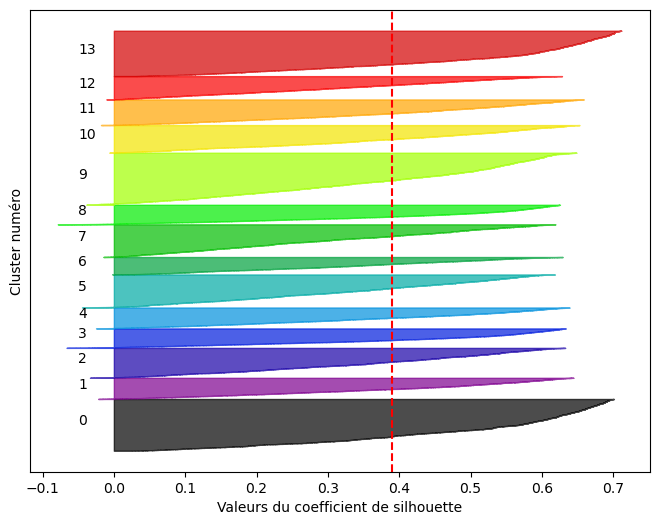

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(X, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / k)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


In [7]:
data['cluster'] = kmeans.labels_

# Affichage des étiquettes de cluster pour chaque point de données
print(data['cluster'])

0         3
1         8
2         3
3         4
4         3
         ..
99994     9
99995     8
99996    12
99997     6
99998     4
Name: cluster, Length: 99999, dtype: int32


In [8]:
data.to_csv("C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain_kmeans1.csv", index=False)